In [43]:
'''this is a bit of a silly experiment to see what VGG would do given map data
(VGG was probably the most successful image recognition neutal net circa 2017)
It seems to somewhat think the earth is a coral reef! or maybe a scuba diver! :D
this is not all silliness as we can use VGG for 'transfer learning', 
wherein we can either (a) train a new model starting from VGG or (b) use the first 
few layers of VGG to compue some more features which we can use in a classical classifer 
like gradient boost. '''

# please note I havent done a great job of commenting this yet. 

# more info at:
# https://keras.io/api/applications/vgg/#vgg16-function
# https://keras.io/guides/transfer_learning/#do-a-round-of-finetuning-of-the-entire-model
# https://ai-pool.com/d/keras-get-layer-of-the-model
# https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/
# https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

Vmodel = VGG16(weights='imagenet', include_top=True)


In [44]:
Vmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [28]:
input = Vmodel.get_layer('input_4')
layer1 = Vmodel.get_layer('block1_conv1')
layer2 = Vmodel.get_layer('block1_conv2')


In [29]:
import tensorflow.keras as keras

model = keras.Sequential([input, layer1, layer2])
layer1.trainable = False
layer2.trainable = False

In [30]:
!git clone https://github.com/NSCC-COGS/Aestheta.git

fatal: destination path 'Aestheta' already exists and is not an empty directory.


In [126]:
import Aestheta.Library.core as core
a = core.getTile(source='google_sat')
# a = core.getTile(xyz=[2.3522,48.8566,10], source='google_sat')
# a = core.getTile(xyz=[-63.2,45.8566,10], source='google_sat')

0 0 0


In [127]:
print(a.shape)

(256, 256, 3)


In [128]:
import tensorflow as tf
a1=a[0:224,0:224,:]
a1 = a1.reshape((1, a1.shape[0], a1.shape[1], a1.shape[2]))
a2 = tf.keras.applications.vgg16.preprocess_input(a1)

In [137]:
b = Vmodel.predict(a2)

In [138]:
label = tf.keras.applications.vgg16.decode_predictions(b)

In [139]:
print(label)

[[('n09256479', 'coral_reef', 0.3588024), ('n10565667', 'scuba_diver', 0.15121676), ('n01498041', 'stingray', 0.07722225), ('n01494475', 'hammerhead', 0.06258156), ('n01491361', 'tiger_shark', 0.03768287)]]


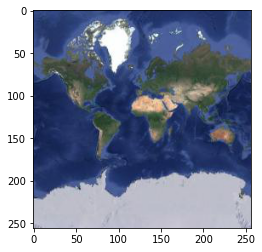

coral_reef 0.3588024
scuba_diver 0.15121676
stingray 0.07722225
hammerhead 0.06258156
tiger_shark 0.03768287


In [140]:
from matplotlib import pyplot as plt
plt.imshow(a)
plt.show()
for i in label[0]:
  print(i[1],i[2])